In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor

import pickle
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
import os
import joblib
import time

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
default_df = pd.read_excel('/kaggle/input/latest-data/default_df_v2.xlsx')
fe_df = pd.read_excel('/kaggle/input/latest-data/fe_data_v2.xlsx')
df = fe_df.sample(n = 10000, random_state = 1998)
outliers = [13719,  9335, 16647, 16375,    98,  1740,  2668, 15960, 12034,
            17020,  9429, 15371, 12127,  6897,  7071, 17977,  8014,  2572,
             2108, 13536,  7726, 11284,  3978, 14630, 19750, 15172, 10177,
             1393,  7903,  2140]
df.drop(index=outliers, inplace = True)

fe_x = df.drop(columns = 'price').copy()
fe_y = df['price'].copy()

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

X_train, X_test, y_train, y_test = train_test_split(fe_x.fillna(0), fe_y, test_size=0.2, random_state=42)
X_train.drop(columns = 'Unnamed: 0', inplace=True)
X_test.drop(columns = 'Unnamed: 0', inplace=True)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7976, 149) (1994, 149)
(7976,) (1994,)


# CV Results of final dataset

In [3]:
loaded_models = {}
loaded_models['Linear Regression'] = joblib.load('/kaggle/input/final-models/linreg1.pkl')
loaded_models['Lasso'] = joblib.load('/kaggle/input/final-models/lasso1.pkl')
loaded_models['Ridge'] = joblib.load('/kaggle/input/final-models/ridge1.pkl')
loaded_models['Elastic Net'] = joblib.load('/kaggle/input/final-models/elasticnet1.pkl')
loaded_models['KNN'] = joblib.load('/kaggle/input/final-models/knn1.pkl')
loaded_models['SVR'] = joblib.load('/kaggle/input/final-models/svr1.pkl')
loaded_models['Decision Tree'] = joblib.load('/kaggle/input/final-models/dt1.pkl')
loaded_models['Random Forest'] = joblib.load('/kaggle/input/final-models/rf1.pkl')
loaded_models['XGBoost'] = joblib.load('/kaggle/input/final-models/xgb1.pkl')
loaded_models['GBM'] = joblib.load('/kaggle/input/final-models/gbm1.pkl')
loaded_models['MLP'] = joblib.load('/kaggle/input/final-models/mlp1.pkl')

loaded_models['Stack All'] = joblib.load('/kaggle/input/final-models/stack_lr_all.pkl')
loaded_models['Stack Top 5'] = joblib.load('/kaggle/input/final-models/stack_top_5.pkl')
loaded_models['Voting All'] = joblib.load('/kaggle/input/final-models/voting_all.pkl')
loaded_models['Voting Top 5'] = joblib.load('/kaggle/input/final-models/voting_top_5.pkl')

[10:16:21] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[10:16:21] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[10:16:22] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, pl

In [4]:
model_names = []
train_mae = []
train_mse = []
train_rmse = []
train_r2 = []
test_mae = []
test_mse = []
test_rmse = []
test_r2 = []
all_st_time = time.time()
for i in loaded_models.items():
    model_names.append(i[0])
    train_preds = i[1].predict(X_train)
    test_preds = i[1].predict(X_test)

    train_mae.append(mean_absolute_error(y_train, train_preds))
    train_mse.append(mean_squared_error(y_train, train_preds))
    train_rmse.append(math.sqrt(mean_squared_error(y_train, train_preds)))
    train_r2.append(r2_score(y_train, train_preds))
    test_mae.append(mean_absolute_error(y_test, test_preds))
    test_mse.append(mean_squared_error(y_test, test_preds))
    test_rmse.append(math.sqrt(mean_squared_error(y_test, test_preds)))
    test_r2.append(r2_score(y_test, test_preds))
    print(f'{i[0]} scored.')

all_fn_time = time.time()    
elapsed_time = all_st_time - all_fn_time
print('Execution time:', elapsed_time, 'seconds')

single_df = pd.DataFrame({
    'Model':model_names,
    'Train MAE':train_mae,
    'Train MSE':train_mse,
    'Train RMSE':train_rmse,
    'Train R2':train_r2,
    'Test MAE':test_mae,
    'Test MSE':test_mse,
    'Test RMSE':test_rmse,
    'Test R2':test_r2
})
single_df = single_df.round(2)

Linear Regression scored.
Lasso scored.
Ridge scored.
Elastic Net scored.
KNN scored.
SVR scored.
Decision Tree scored.
Random Forest scored.
XGBoost scored.
GBM scored.
MLP scored.
Stack All scored.
Stack Top 5 scored.
Voting All scored.
Voting Top 5 scored.
Execution time: -126.98646593093872 seconds


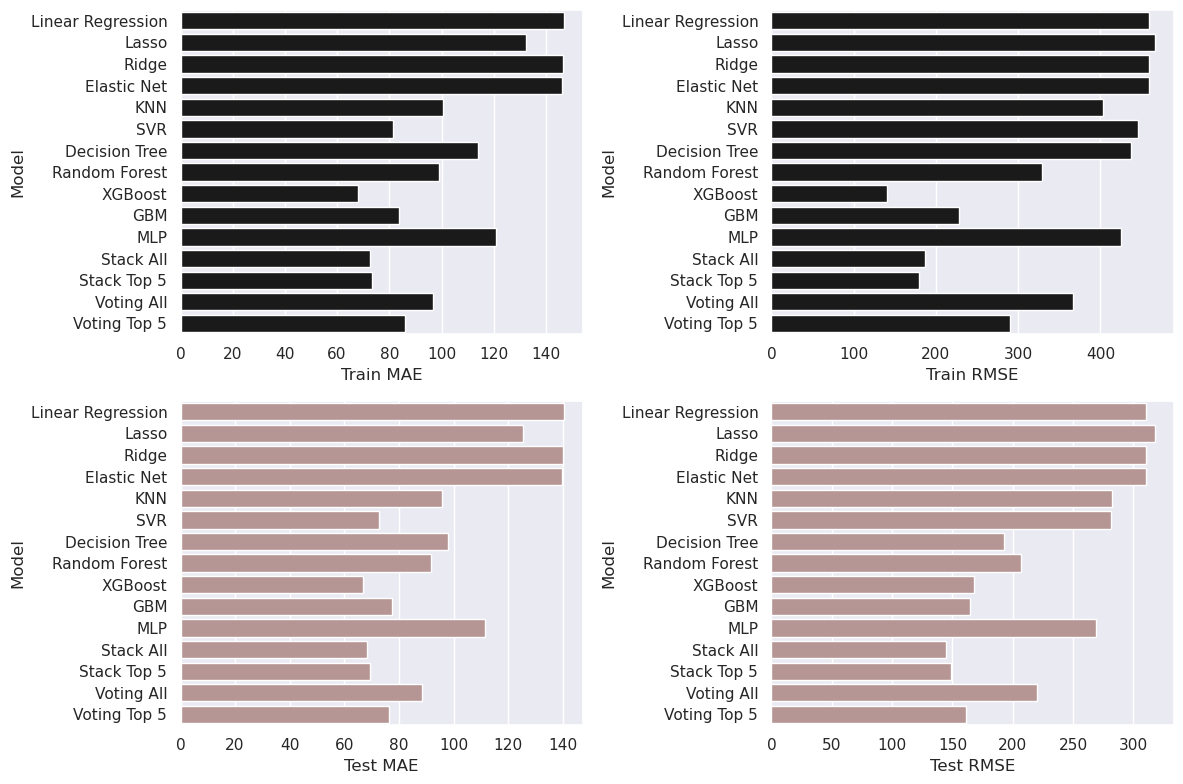

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

sns.barplot(data=single_df, y = 'Model', x = 'Train MAE', color= 'k', dodge=False, ax=axes[0])
sns.barplot(data=single_df, y = 'Model', x = 'Train RMSE', color= 'k', dodge=False, ax=axes[1])
sns.barplot(data=single_df, y = 'Model', x = 'Test MAE', color= 'rosybrown', dodge=False, ax=axes[2])
sns.barplot(data=single_df, y = 'Model', x = 'Test RMSE', color= 'rosybrown', dodge=False, ax=axes[3])
# palette = dark:salmon_r or crest

# for i in range(4):
#     axes[i].get_legend().remove()
fig.tight_layout()
plt.show()

# CV Results of raw dataset

In [6]:
raw_models = {}
raw_models['Linear Regression'] = joblib.load('/kaggle/input/raw-models/linreg1.pkl')
raw_models['Lasso'] = joblib.load('/kaggle/input/raw-models/lasso1.pkl')
raw_models['Ridge'] = joblib.load('/kaggle/input/raw-models/ridge1.pkl')
raw_models['Elastic Net'] = joblib.load('/kaggle/input/raw-models/elasticnet1.pkl')
raw_models['KNN'] = joblib.load('/kaggle/input/raw-models/knn1.pkl')
raw_models['SVR'] = joblib.load('/kaggle/input/raw-models/svr1.pkl')
raw_models['Decision Tree'] = joblib.load('/kaggle/input/raw-models/dt1.pkl')
raw_models['Random Forest'] = joblib.load('/kaggle/input/raw-models/rf1.pkl')
raw_models['XGBoost'] = joblib.load('/kaggle/input/raw-models/xgb1.pkl')
raw_models['GBM'] = joblib.load('/kaggle/input/raw-models/gbm1.pkl')
raw_models['MLP'] = joblib.load('/kaggle/input/raw-models/mlp1.pkl')

raw_models['Stack All'] = joblib.load('/kaggle/input/raw-models/stack_lr_all.pkl')
raw_models['Stack Top 5'] = joblib.load('/kaggle/input/raw-models/stack_top_5.pkl')
raw_models['Voting All'] = joblib.load('/kaggle/input/raw-models/voting_all.pkl')
raw_models['Voting Top 5'] = joblib.load('/kaggle/input/raw-models/voting_top_5.pkl')

[10:18:37] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[10:18:37] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[10:18:37] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, pl

In [7]:
default_df = pd.read_excel('/kaggle/input/latest-data/default_df_v2.xlsx')
df = default_df.sample(n = 10000, random_state = 1998)
outliers = [13719,  9335, 16647, 16375,    98,  1740,  2668, 15960, 12034,
            17020,  9429, 15371, 12127,  6897,  7071, 17977,  8014,  2572,
             2108, 13536,  7726, 11284,  3978, 14630, 19750, 15172, 10177,
             1393,  7903,  2140]
df.drop(index=outliers, inplace = True)
default_x = df.drop(columns = 'price').copy()
default_y = df['price'].copy()

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(default_x.fillna(0), default_y, test_size=0.2, random_state=42)
X_train_raw.drop(columns = 'Unnamed: 0', inplace=True)
X_test_raw.drop(columns = 'Unnamed: 0', inplace=True)
print(X_train_raw.shape, X_test_raw.shape)
print(y_train_raw.shape, y_test_raw.shape)

(7976, 92) (1994, 92)
(7976,) (1994,)


In [8]:
model_names = []
train_mae = []
train_mse = []
train_rmse = []
train_r2 = []
test_mae = []
test_mse = []
test_rmse = []
test_r2 = []
all_st_time = time.time()
for i in raw_models.items():
    model_names.append(i[0])
    train_preds = i[1].predict(X_train_raw)
    test_preds = i[1].predict(X_test_raw)

    train_mae.append(mean_absolute_error(y_train_raw, train_preds))
    train_mse.append(mean_squared_error(y_train_raw, train_preds))
    train_rmse.append(math.sqrt(mean_squared_error(y_train_raw, train_preds)))
    train_r2.append(r2_score(y_train_raw, train_preds))
    test_mae.append(mean_absolute_error(y_test_raw, test_preds))
    test_mse.append(mean_squared_error(y_test_raw, test_preds))
    test_rmse.append(math.sqrt(mean_squared_error(y_test_raw, test_preds)))
    test_r2.append(r2_score(y_test_raw, test_preds))
    print(f'{i[0]} scored.')

all_fn_time = time.time()    
elapsed_time = all_st_time - all_fn_time
print('Execution time:', elapsed_time, 'seconds')

raw_df = pd.DataFrame({
    'Model':model_names,
    'Train MAE':train_mae,
    'Train MSE':train_mse,
    'Train RMSE':train_rmse,
    'Train R2':train_r2,
    'Test MAE':test_mae,
    'Test MSE':test_mse,
    'Test RMSE':test_rmse,
    'Test R2':test_r2
})
raw_df = raw_df.round(2)

Linear Regression scored.
Lasso scored.
Ridge scored.
Elastic Net scored.
KNN scored.
SVR scored.
Decision Tree scored.
Random Forest scored.
XGBoost scored.
GBM scored.
MLP scored.
Stack All scored.
Stack Top 5 scored.
Voting All scored.
Voting Top 5 scored.
Execution time: -75.5673816204071 seconds


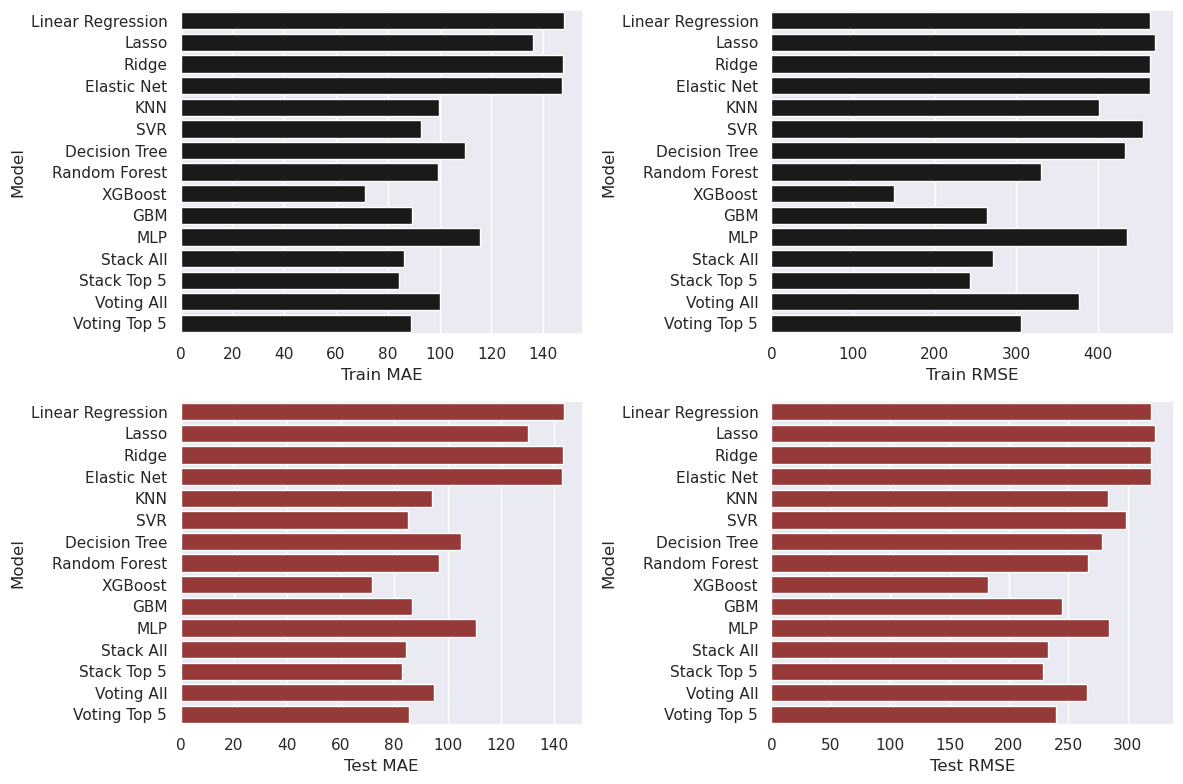

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

sns.barplot(data=raw_df, y = 'Model', x = 'Train MAE', color= 'k', dodge=False, ax=axes[0])
sns.barplot(data=raw_df, y = 'Model', x = 'Train RMSE', color= 'k', dodge=False, ax=axes[1])
sns.barplot(data=raw_df, y = 'Model', x = 'Test MAE', color= 'brown', dodge=False, ax=axes[2])
sns.barplot(data=raw_df, y = 'Model', x = 'Test RMSE', color= 'brown', dodge=False, ax=axes[3])
# palette = dark:salmon_r or crest

# for i in range(4):
#     axes[i].get_legend().remove()
fig.tight_layout()
plt.show()

In [10]:
raw_df

,Model,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Linear Regression,147.93,215259.23,463.96,0.23,143.53,102203.24,319.69,0.36
1,Lasso,135.84,220732.36,469.82,0.21,130.02,104277.34,322.92,0.35
2,Ridge,147.57,215270.27,463.97,0.23,143.16,102195.70,319.68,0.36
3,Elastic Net,147.36,215269.76,463.97,0.23,142.94,102207.65,319.70,0.36
4,KNN,99.66,161169.28,401.46,0.42,94.12,80308.08,283.39,0.50
5,SVR,92.85,207334.78,455.34,0.26,85.14,89080.32,298.46,0.44
6,Decision Tree,109.78,187711.55,433.26,0.33,104.97,77507.15,278.40,0.52
7,Random Forest,99.33,109297.51,330.60,0.61,96.65,71185.47,266.81,0.55
8,XGBoost,71.13,22680.27,150.60,0.92,71.74,33252.58,182.35,0.79
9,GBM,89.52,69577.22,263.77,0.75,86.77,59968.84,244.89,0.62


In [11]:
single_df

,Model,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
0,Linear Regression,146.86,210425.54,458.72,0.25,140.40,96398.48,310.48,0.40
1,Lasso,132.19,217287.73,466.14,0.22,125.51,100985.97,317.78,0.37
2,Ridge,146.47,210404.12,458.70,0.25,140.00,96391.24,310.47,0.40
3,Elastic Net,146.22,210387.90,458.68,0.25,139.77,96399.45,310.48,0.40
4,KNN,100.58,162013.54,402.51,0.42,95.74,79481.60,281.92,0.50
5,SVR,81.58,198248.89,445.25,0.29,72.58,79196.55,281.42,0.50
6,Decision Tree,114.03,191290.18,437.37,0.32,98.13,36993.35,192.34,0.77
7,Random Forest,99.20,107984.26,328.61,0.61,91.89,42873.62,207.06,0.73
8,XGBoost,68.03,19717.04,140.42,0.93,66.75,28211.31,167.96,0.82
9,GBM,83.88,52201.07,228.48,0.81,77.35,27193.18,164.90,0.83


# Model Confidence Set

Take the loss for every example in the dataset. `y-y_hat ** 2` for RMSE, `y-y_hat` for MAE. Should have a df of losses, each column represents a model. This will be used as input for MCS. 

In [14]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 13.5 MB/s eta 0:00:00a 0:00:01


In [16]:
from arch.bootstrap import MCS

In [23]:
fe_mae_train_df = {}
fe_mae_test_df = {}
fe_rmse_train_df = {}
fe_rmse_test_df = {}

all_st_time = time.time()
for i in loaded_models.items():
    train_preds = i[1].predict(X_train)
    test_preds = i[1].predict(X_test)
    
    fe_mae_train_df[i[0]] = abs(y_train - train_preds)
    fe_mae_test_df[i[0]] = abs(y_test - test_preds)
    fe_rmse_train_df[i[0]] = (y_train - train_preds)**2
    fe_rmse_test_df[i[0]] = (y_test - test_preds)**2
    
    print(f'{i[0]} scored.')

all_fn_time = time.time()    
elapsed_time = all_st_time - all_fn_time
print('Execution time:', elapsed_time, 'seconds')

fe_mae_train_df = pd.DataFrame(fe_mae_train_df)
fe_mae_test_df = pd.DataFrame(fe_mae_test_df)
fe_rmse_train_df = pd.DataFrame(fe_rmse_train_df)
fe_rmse_test_df = pd.DataFrame(fe_rmse_test_df)

Linear Regression scored.
Lasso scored.
Ridge scored.
Elastic Net scored.
KNN scored.
SVR scored.
Decision Tree scored.
Random Forest scored.
XGBoost scored.
GBM scored.
MLP scored.
Stack All scored.
Stack Top 5 scored.
Voting All scored.
Voting Top 5 scored.
Execution time: -123.60723567008972 seconds


In [26]:
mcs_MAE_train = MCS(fe_mae_train_df, size = 0.10)
mcs_MAE_train.compute()
mcs_MAE_test = MCS(fe_mae_test_df, size = 0.10)
mcs_MAE_test.compute()
mcs_RMSE_train = MCS(fe_rmse_train_df, size = 0.10)
mcs_RMSE_train.compute()
mcs_RMSE_test = MCS(fe_rmse_test_df, size = 0.10)
mcs_RMSE_test.compute()
print("MCS p-values MAE Train")
print(mcs_MAE_train.pvalues)
print("Included")
print(mcs_MAE_train.included)

print("MCS p-values MAE Test")
print(mcs_MAE_test.pvalues)
print("Included")
print(mcs_MAE_test.included)

print("MCS p-values RMSE Train")
print(mcs_RMSE_train.pvalues)
print("Included")
print(mcs_RMSE_train.included)

print("MCS p-values RMSE Test")
print(mcs_RMSE_test.pvalues)
print("Included")
print(mcs_RMSE_test.included)

MCS p-values MAE Train
                   Pvalue
Model name               
Elastic Net         0.000
Ridge               0.000
Linear Regression   0.000
Lasso               0.000
MLP                 0.000
Decision Tree       0.000
Random Forest       0.000
GBM                 0.000
Voting All          0.000
KNN                 0.000
Voting Top 5        0.000
Stack Top 5         0.000
Stack All           0.000
SVR                 0.004
XGBoost             1.000
Included
['XGBoost']
MCS p-values MAE Test
                   Pvalue
Model name               
Ridge               0.000
Linear Regression   0.000
Elastic Net         0.000
Lasso               0.000
MLP                 0.000
Decision Tree       0.000
Random Forest       0.000
KNN                 0.000
Voting All          0.000
GBM                 0.000
Voting Top 5        0.000
Stack Top 5         0.132
SVR                 0.583
Stack All           0.583
XGBoost             1.000
Included
['SVR', 'Stack All', 'Stack Top 5', 'XGBo

In [27]:
raw_mae_train_df = {}
raw_mae_test_df = {}
raw_rmse_train_df = {}
raw_rmse_test_df = {}

all_st_time = time.time()
for i in raw_models.items():
    raw_train_preds = i[1].predict(X_train_raw)
    raw_test_preds = i[1].predict(X_test_raw)
    
    raw_mae_train_df[i[0]] = abs(y_train_raw - raw_train_preds)
    raw_mae_test_df[i[0]] = abs(y_test_raw - raw_test_preds)
    raw_rmse_train_df[i[0]] = (y_train_raw - raw_train_preds)**2
    raw_rmse_test_df[i[0]] = (y_test_raw - raw_test_preds)**2
    
    print(f'{i[0]} scored.')

all_fn_time = time.time()    
elapsed_time = all_st_time - all_fn_time
print('Execution time:', elapsed_time, 'seconds')

raw_mae_train_df = pd.DataFrame(raw_mae_train_df)
raw_mae_test_df = pd.DataFrame(raw_mae_test_df)
raw_rmse_train_df = pd.DataFrame(raw_rmse_train_df)
raw_rmse_test_df = pd.DataFrame(raw_rmse_test_df)

Linear Regression scored.
Lasso scored.
Ridge scored.
Elastic Net scored.
KNN scored.
SVR scored.
Decision Tree scored.
Random Forest scored.
XGBoost scored.
GBM scored.
MLP scored.
Stack All scored.
Stack Top 5 scored.
Voting All scored.
Voting Top 5 scored.
Execution time: -74.33465886116028 seconds


In [28]:
raw_mcs_MAE_train = MCS(raw_mae_train_df, size = 0.10)
raw_mcs_MAE_train.compute()
raw_mcs_MAE_test = MCS(raw_mae_test_df, size = 0.10)
raw_mcs_MAE_test.compute()
raw_mcs_RMSE_train = MCS(raw_rmse_train_df, size = 0.10)
raw_mcs_RMSE_train.compute()
raw_mcs_RMSE_test = MCS(raw_rmse_test_df, size = 0.10)
raw_mcs_RMSE_test.compute()
print("MCS p-values MAE Train")
print(raw_mcs_MAE_train.pvalues)
print("Included")
print(raw_mcs_MAE_train.included)

print("MCS p-values MAE Test")
print(raw_mcs_MAE_test.pvalues)
print("Included")
print(raw_mcs_MAE_test.included)

print("MCS p-values RMSE Train")
print(raw_mcs_RMSE_train.pvalues)
print("Included")
print(raw_mcs_RMSE_train.included)

print("MCS p-values RMSE Test")
print(raw_mcs_RMSE_test.pvalues)
print("Included")
print(raw_mcs_RMSE_test.included)

MCS p-values MAE Train
                   Pvalue
Model name               
Linear Regression     0.0
Ridge                 0.0
Elastic Net           0.0
Lasso                 0.0
MLP                   0.0
Random Forest         0.0
Decision Tree         0.0
Voting All            0.0
GBM                   0.0
Stack Top 5           0.0
KNN                   0.0
Stack All             0.0
Voting Top 5          0.0
SVR                   0.0
XGBoost               1.0
Included
['XGBoost']
MCS p-values MAE Test
                   Pvalue
Model name               
Linear Regression   0.000
Ridge               0.000
Elastic Net         0.000
Lasso               0.000
MLP                 0.000
Decision Tree       0.000
Random Forest       0.000
GBM                 0.000
Voting All          0.000
Voting Top 5        0.000
Stack All           0.000
Stack Top 5         0.000
KNN                 0.001
SVR                 0.006
XGBoost             1.000
Included
['XGBoost']
MCS p-values RMSE Train
     